<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h4 style="color: #FF6347;">00 | Librerías, settings, funciones</h2>

In [ ]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualization
import matplotlib.dates as mdates # manipulation of dates
import seaborn as sns # to plot correlation matrix
import plotly.graph_objects as go # para gráficos de dispersion

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions ~ Reusables, se pueden encontrar en mi repo --> https://github.com/isi-mube/tailor-s-drawer/blob/main/easy/functions.py
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces, "DuplicateRows": duplicate_rows}) # New dataframe with the results
    return exploration

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h4 style="color: #FF6347;">01 | EDA</h2>

In [ ]:
data = pd.read_csv('financial_assets_prices.csv')

In [ ]:
open_data(data) # returns shape, data types & shows a small sample

Data shape is (783, 6).

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

Data row sample and full columns:


,date,Asset1,Asset2,Asset3,Asset4,Asset5
360,2020-05-20,247.1533,65.284,27.991862,305.46,41.630
397,2020-07-10,251.6951,69.198,29.665158,316.86,45.125
130,2019-07-03,247.8861,66.141,30.915227,324.93,52.340
727,2021-10-15,250.0902,97.417,36.824800,342.15,71.050
241,2019-12-05,247.1606,68.453,31.604759,327.70,51.440


In [ ]:
data.columns = [column.replace('Asset', 'activo_') for column in data.columns] # para mayor claridad, traduciremos la palabra Asset

In [ ]:
data.head(0)

,date,activo_1,activo_2,activo_3,activo_4,activo_5


In [ ]:
# Antes de continuar con el ejercicio, analizaremos también activos para tener un vistazo general:
data.describe()

,activo_1,activo_2,activo_3,activo_4,activo_5
count,770.000000,770.000000,770.000000,734.000000,763.000000
mean,248.980188,76.112381,31.473296,327.356880,54.123198
std,6.845006,13.642823,3.304415,13.487611,8.185047
min,229.701200,48.516000,22.895066,272.790000,37.340000
25%,246.868050,64.786250,29.281948,318.765000,49.120000
50%,250.685350,72.003000,30.651198,326.665000,52.720000
75%,253.379275,88.973000,33.757265,340.155000,59.500000
max,259.110000,104.663000,39.115000,345.710000,71.050000


### Sobre .describe():

* El número total máximo de entradas es 770, activo 4 y activo 5 tienen 734, lo que significa que hay valores ausentes.
* **mean**: El activo 1 tiene el valor promedio más alto --> 248.98. El activo 5 tiene el promedio más bajo --> 54.12.
* **Std**: Los valores son bastante bajos, lo que indica que los valores suelen estar en el promedio de los datos. Activo 1, además de tener el valor promedio más alto, tiene la desviación más baja, lo que indica valores estables en el mercado.
* Si comparamos los min y max por cada activo, vemos leve mejora en los activos 1 y 4, siendo más estables con el paso del tiempo.
* La distribución de los datos en los diferentes cuartiles es bastante balanceada.

In [ ]:
# Para entender mejor la fecha inicial y final de los activos:
print(f"Fecha mínima: {data['date'].min()}")
print(f"Fecha máxima: {data['date'].max()}")

Fecha mínima: 2019-01-02
Fecha máxima: 2021-12-31


In [ ]:
data.head(40) # Para comprobar 40 días desde el inciio del registro

,date,activo_1,activo_2,activo_3,activo_4,activo_5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
5,2019-01-09,230.1550,57.630,26.197380,304.67,52.86
6,2019-01-10,230.4994,57.667,26.348124,304.78,52.89
7,2019-01-11,230.8193,57.692,26.370964,305.27,52.81
8,2019-01-14,231.0823,57.589,26.192812,305.26,52.62
9,2019-01-15,231.3187,57.966,26.338988,305.64,52.54


<h3 style="color: #FF6347;">Extra --> Sobre los datos:</h2>

Los datos contienen un total de **783 registros** que reflejan la evolución económica de **cinco activos** durante un perído de dos años que abarca desde el **2 de enero de 2019** hasta el **31 de diciembre de 2021**.

* Cada entrada incluye una fecha y el valor correspondiente en cada activo.
* Algunas entradas, a primer vistazo, parece tener valores ausentes (NaN)
* Hay saltos en las entradas, que puede corresponder a la no-entrada de datos durante el fin de semana.

**Más**... Los portafolios de inversión son una selección de activos financieros en los que alguien decide invertir su dinero. El objetivo de tener un portafolio de inversión es diversificar los riesgos, de tal manera que si una inversión en particular tiene pérdidas, las otras inversiones puedan compensar esa pérdida y mantener el valor total del portafolio en un nivel aceptable.

<h4 style="color: #FF6347;">02 | Data Cleaning</h2>

<h4 style="color: #FF6347;">Comprobando Duplicados, NaNs y Espacios vacíos</h2>

In [ ]:
explore_data(data) # sum & returns duplicates, NaN & empty spaces

,NaN,EmptySpaces,DuplicateRows
date,0,0,0
activo_1,13,0,0
activo_2,13,0,0
activo_3,13,0,0
activo_4,49,0,0
activo_5,20,0,0


In [ ]:
# Diccionario para guardar los datos. Nombre de columna: Porcentaje de NaN (total NaN / len(data)
nan_dic = {col: (data[col].isnull().sum() / len(data)) * 100 for col in data.columns if 'activo_' in col}

# Visualizamos los resultados
for asset, percentage in nan_dic.items():
    print(f"Porcentaje de NaN en {asset}: {percentage:.2f}%")

Porcentaje de NaN en activo_1: 1.66%
Porcentaje de NaN en activo_2: 1.66%
Porcentaje de NaN en activo_3: 1.66%
Porcentaje de NaN en activo_4: 6.26%
Porcentaje de NaN en activo_5: 2.55%


<h4 style="color: #FF6347;">Lidiando con los NaN</h2>

* Hay 3 Activos con un número de NaN de 1.66%, no parece muy signifcativo,
* Sin embargo, uno de los Assets tiene un porcentaje de 6.26%.

Al ser datos financieros, hacer .dropna no sería muy adecuado, ya que podríamos evadir información crucial.

In [ ]:
# filtrando NaNs en Asset1
data[data.activo_1.isna()]

,date,activo_1,activo_2,activo_3,activo_4,activo_5
77,2019-04-19,NaN,NaN,NaN,NaN,NaN
78,2019-04-22,NaN,NaN,NaN,NaN,NaN
85,2019-05-01,NaN,NaN,NaN,NaN,NaN
255,2019-12-25,NaN,NaN,NaN,NaN,NaN
256,2019-12-26,NaN,NaN,NaN,NaN,NaN
260,2020-01-01,NaN,NaN,NaN,NaN,NaN
332,2020-04-10,NaN,NaN,NaN,NaN,NaN
333,2020-04-13,NaN,NaN,NaN,NaN,NaN
347,2020-05-01,NaN,NaN,NaN,NaN,NaN
517,2020-12-25,NaN,NaN,NaN,NaN,NaN


* Los 13 NaN de Activo 1 coinciden con NaN en otros activos, de hacer drop, podríamos mejorar la interpretación de los datos. 1.66% no es muy significativo.
* Suele haber no registros, NaN, en abril de 2019, 2020 y 2021 y a finales de año, por Navidad. Es decir, en festivos de semana santa y fin de año.
* Otra opción es hacer forward fill con las últimas entradas de registro o backward fill. **Utilizaremos forward fill** para lidiar con los NaN.

<h4 style="color: #FF6347;">Aplicando Forward Fill</h2>

In [ ]:
df = data.copy() # lo haremos en un segundo dataframe, por seguridad

# Primero aplicamos forward-fill, para llenar los NaN con el siguiente valor conocido
df.fillna(method='ffill', inplace=True)

explore_data(df)

,NaN,EmptySpaces,DuplicateRows
date,0,0,0
activo_1,0,0,0
activo_2,0,0,0
activo_3,0,0,0
activo_4,0,0,0
activo_5,0,0,0


Solucionado como si NaN

<h2 style="color: #FF8C00;">Respuesta !</h2>
<h3 style="color: #FF6347;">Gráfico final</h3>

In [ ]:
# Convirtiendo date to datetime para poder manipular los datos
df['date'] = pd.to_datetime(df['date'])

# Convirtiendo date a índice, para que el dataframe sea timeseries
df.set_index('date', inplace=True)

# Normalizando los acivos para empezar con el mismo precio --> 100 EUR.
df_100 = df.apply(lambda x: x / x[0] * 100)

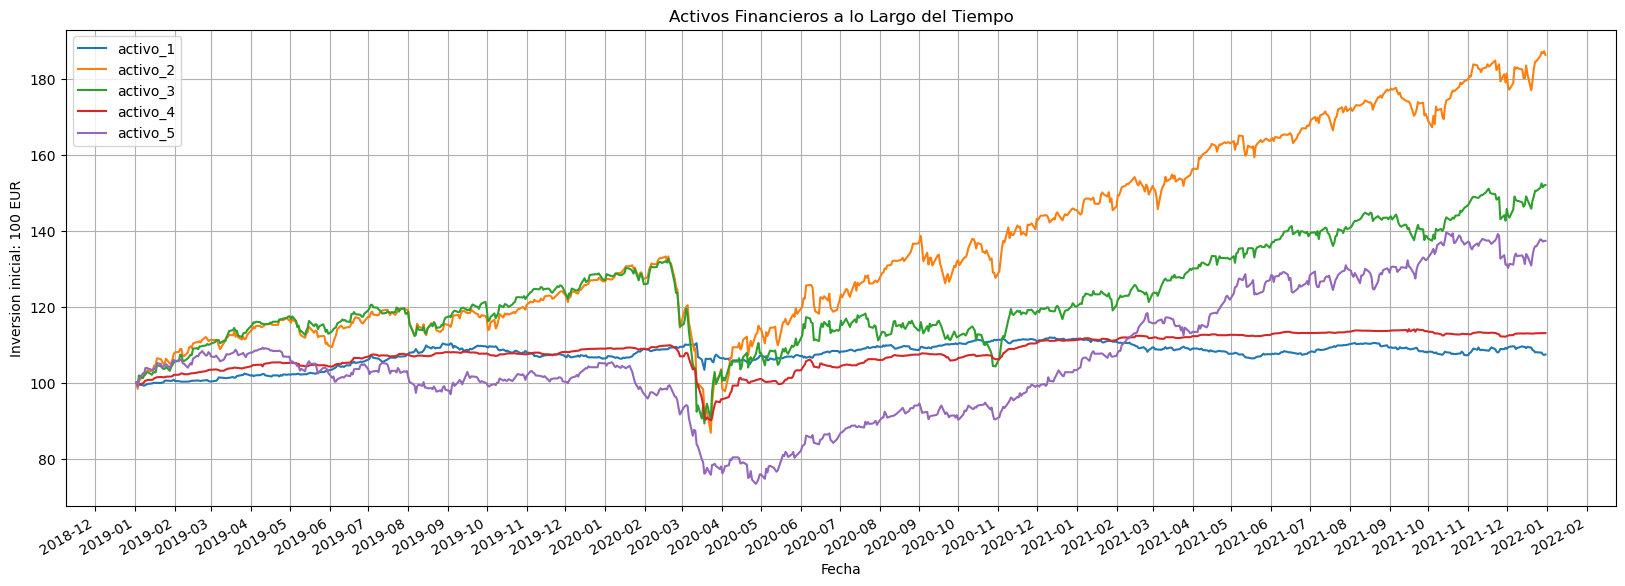

In [ ]:
# Figura inicial
plt.figure(figsize=(20, 7))

# Añadiendo las columnas en el plot
for column in df_100.columns:
    plt.plot(df_100.index, df_100[column], label=column)

# Añadiendo dates formateados en X-Axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # sólo seleccionaremos Año y Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate() # Rotation

# Texto para los plots
plt.title('Activos Financieros a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Inversion inicial: 100 EUR')

# Leyenda - Significado de cáda color en el gráfico
plt.legend()

# Añadiendo un Grid, para mejorar la interpretación
plt.grid(True)

# Plotting
plt.show()

<strong>En el gráfico podemos ver la evolución de estos 5 activos:</strong>
<ul>
<li><span style="color: blue;">Activo 1</span> y <span style="color: red;">Activo 4</span> parecen ser más estables en el tiempo, lo que podría significar inversiones más seguras y estables como el oro y la plata.</li>
<li>Los <span style="color: yellow;">Activo 2</span>, <span style="color: green;">Activo 3</span> y <span style="color: violet;">Activo 5</span> muestran una alta volatilidad alrededor de <strong>2020-02</strong> (época de COVID), lo que significa que están fuertemente influenciados por las condiciones del mercado y son menos estables.</li>
<li>A pesar de su bajada inicial en esos meses, muestran un pico de ascenso favorable alrededor de <strong>2020-04</strong>, tras el pánico inicial del mercado, siendo el <span style="color: yellow;">Activo 2</span> el que muestra mejor rendimiento.</li>
</ul>

Parece ser, a primer vistazo, una cartera bastante balanceada, con diversificación en activos más estables y otros más susceptibles a cambios del mercado, pero con un buen rendimiento a largo plazo. Con los siguientes gráficos y análisis, podremos comprender mejor su rendimiento.

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
# Calcular los rendimientos diarios porcentuales usando .pct_change -comparando con el value anterior-
returns = round(df.pct_change() * 100, 2)

# Empezamos obviando la primera entrada, ya que no hay rendimiento para comparar
print(f'Rendimientos diarios (primeras entradas): \n\n {returns[1:].head(5)}, \n\n Rendimientos diarios (últimas entradas) \n\n{returns.tail(5)}')

Rendimientos diarios (primeras entradas): 

             activo_1  activo_2  activo_3  activo_4  activo_5
date                                                        
2019-01-03     -0.20     -1.61     -0.57     -0.27     -0.94
2019-01-04     -0.27      2.10      2.53     -0.11      1.92
2019-01-07     -0.15      1.26     -0.73      0.19      1.48
2019-01-08     -0.15      0.10      0.70      0.36     -0.02
2019-01-09      0.20      1.29      0.23      0.41      1.40, 

 Rendimientos diarios (últimas entradas) 

            activo_1  activo_2  activo_3  activo_4  activo_5
date                                                        
2021-12-27     -0.09      0.74      0.54      0.00      1.34
2021-12-28      0.01      0.55      0.76      0.00     -0.11
2021-12-29     -0.49     -0.16     -0.66      0.02     -0.31
2021-12-30     -0.07      0.29      0.33      0.03      0.14
2021-12-31      0.08     -0.53      0.05      0.01      0.00


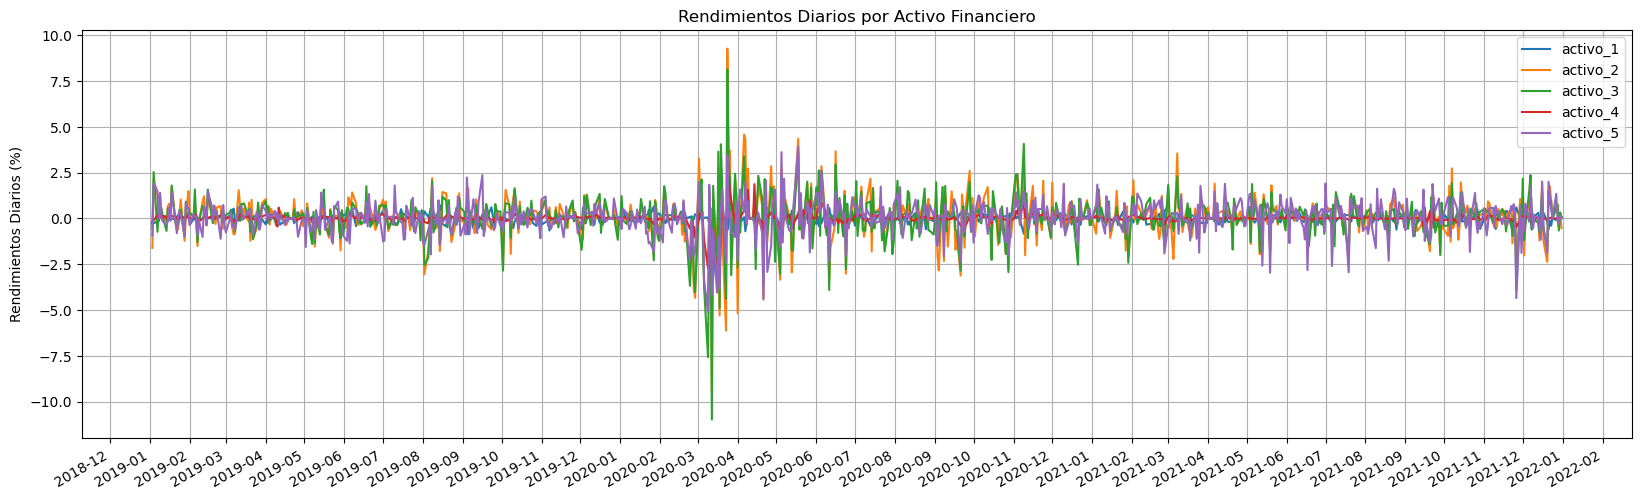

In [ ]:
plt.figure(figsize=(20, 6))

for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column)

# Añadiendo dates formateados en X-Axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotation

plt.ylabel('Rendimientos Diarios (%)')
plt.title('Rendimientos Diarios por Activo Financiero')
plt.legend()
plt.grid(True)
plt.show()

<strong>En el gráfico podemos ver los rendimientos diarios de estos activos:</strong>

- <span style="color: blue;">Asset 1</span> parece seguir estable en el tiempo.
- <span style="color: yellow;">Asset 2</span>, <span style="color: green;">Asset 3</span> y <span style="color: violet;">Asset 5</span> parecen mostrar más picos de volatilidad.
    - Especialmente el <span style="color: green;">Asset 3</span> muestra una mayor bajada de rendimiento diario en <strong>2020-03</strong>
    - El mayor pico de subida en rendimiento diario sigue siendo el <span style="color: yellow;">Asset 2</span>.
    - El <span style="color: violet;">Asset 5</span>, como se vio en el gráfico anterior, sigue estando sujeto a la volatilidad del mercado pero presenta menos cambios respecto al <span style="color: yellow;">Asset 2</span> y al <span style="color: green;">Asset 3</span>, siendo más estable y conllevando un riesgo menor.


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

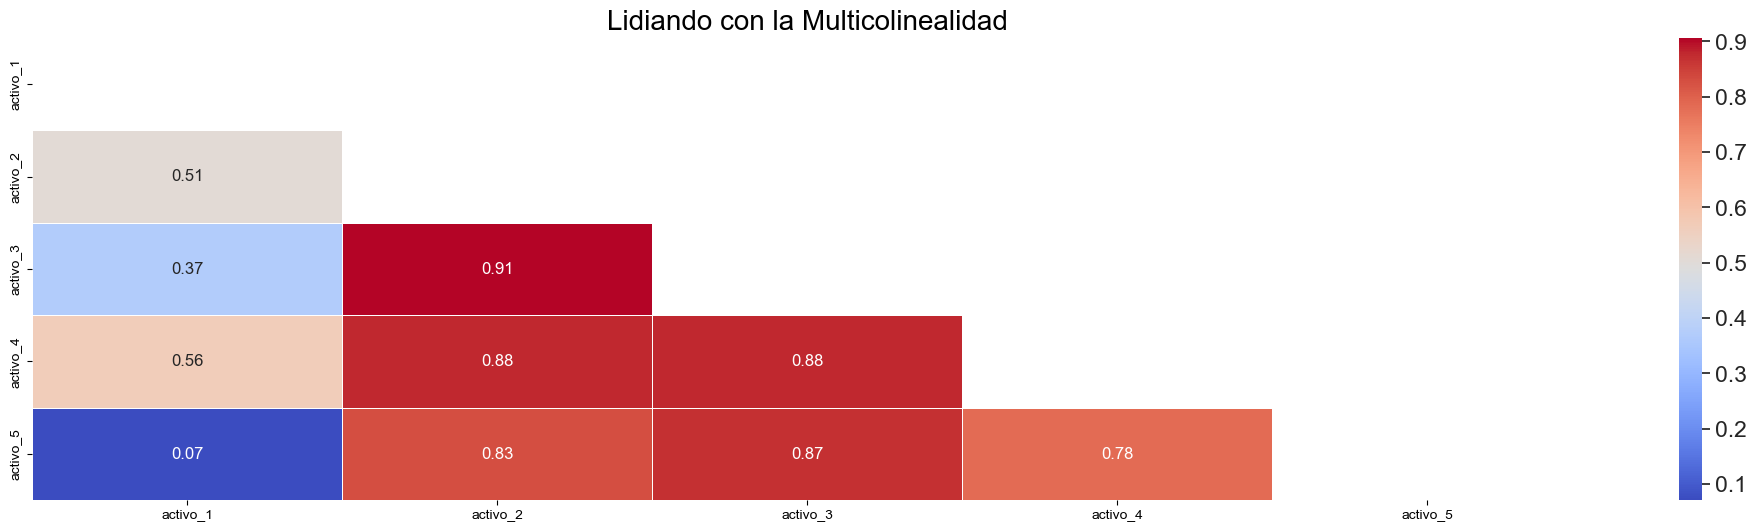

In [ ]:
# Correlation matrix
df_m = round(df.corr(),4)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(df_m)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 6))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(df_m, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Lidiando con la Multicolinealidad", fontsize=20) # add title
plt.show()

<h2 style="color: #FF6347;">Respuesta</h2>

In [ ]:
df_m

,activo_1,activo_2,activo_3,activo_4,activo_5
activo_1,1.0000,0.5067,0.3696,0.5638,0.0711
activo_2,0.5067,1.0000,0.9061,0.8775,0.8301
activo_3,0.3696,0.9061,1.0000,0.8774,0.8700
activo_4,0.5638,0.8775,0.8774,1.0000,0.7839
activo_5,0.0711,0.8301,0.8700,0.7839,1.0000


<strong>En la tabla y en el gráfico podemos ver la evolución de estos 5 activos:</strong>

<ul>
<li><span style="color: red;">Activo 4</span> y <span style="color: blue;">Activo 1</span> parecen ser más estables en el tiempo, lo que podría significar inversiones más seguras y estables como el oro y la plata.</li>
<li>Los <span style="color: yellow;">Activo 2</span>, <span style="color: green;">Activo 3</span> y <span style="color: violet;">Activo 5</span> muestran una alta volatilidad alrededor de <strong>2020-02</strong> (época de COVID), lo que significa que están fuertemente influenciados por las condiciones del mercado y son menos estables.</li>
<li>A pesar de su bajada inicial en esos meses, muestran un pico de ascenso favorable alrededor de <strong>2020-04</strong>, tras el pánico inicial del mercado, siendo el <span style="color: red;">Activo 2</span> el que muestra mejor rendimiento.</li>
<li>Para el siguiente gráfico (de dispersión) sería interesante analizar el <span style="color: red;">Activo 4</span> (rendimiento estable) y <span style="color: yellow;">Activo 2</span> (mayor rendimiento) para evaluar la compensación entre riesgo y retorno.</li>
</ul>

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

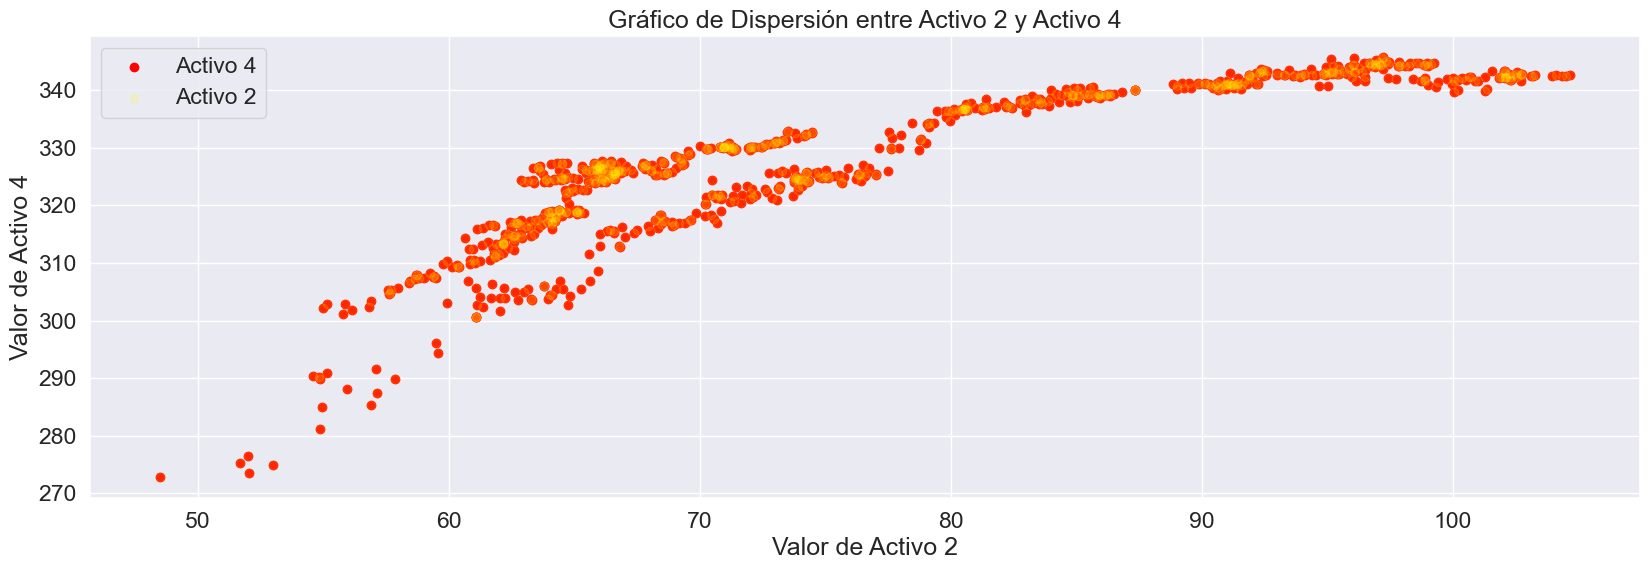

In [ ]:
plt.figure(figsize=(20, 6))

# Graficar activo_4 vs activo_2 con puntos rojos.
plt.scatter(df['activo_2'], df['activo_4'], alpha=1, color='red', label='Activo 4')

# Graficar nuevamente activo_4 vs activo_2 con puntos amarillos y menor alfa para ver la superposición.
plt.scatter(df['activo_2'], df['activo_4'], alpha=0.15, color='yellow', label='Activo 2')

plt.title('Gráfico de Dispersión entre Activo 2 y Activo 4')
plt.xlabel('Valor de Activo 2')
plt.ylabel('Valor de Activo 4')
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Respuesta</h2>

<strong>En el gráfico de dispersión podemos ver:</strong>
<ul>
  <li>La <strong>variabilidad</strong>: Aunque ambos activos parecen moverse juntos, el <span style="color: red;">Activo 4</span> parece tener puntos más agrupados, lo que puede indicar que es menos volátil, a pesar de su alta correlación.</li>
  <li>Los <strong>rangos de valor</strong>: Operan en rangos distintos, con el <span style="color: red;">Activo 4</span> en valores entre 270 y 340, y el <span style="color: yellow;">Activo 2</span> entre 50 y 100.</li>
  <li>La <strong>volatilidad y rendimiento</strong>: El <span style="color: yellow;">Activo 2</span> parece ser más volátil que el <span style="color: red;">Activo 4</span> en cuanto a su rango de precios, pero tiene un mejor potencial de rendimiento, asociado a un mayor riesgo. El pico de rendimiento de este activo parece influenciado por eventos específicos (COVID), dónde sería interesante comprar más.</li>
</ul>


<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
weights = pd.read_csv('portfolio_weights.csv')

In [ ]:
weights.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [ ]:
weights.columns = [column.replace('Asset', 'activo_') for column in weights.columns] # para mayor claridad, traduciremos la palabra Asset

In [ ]:
weights['date'] = pd.to_datetime(weights['date'])
weights.set_index('date', inplace=True)

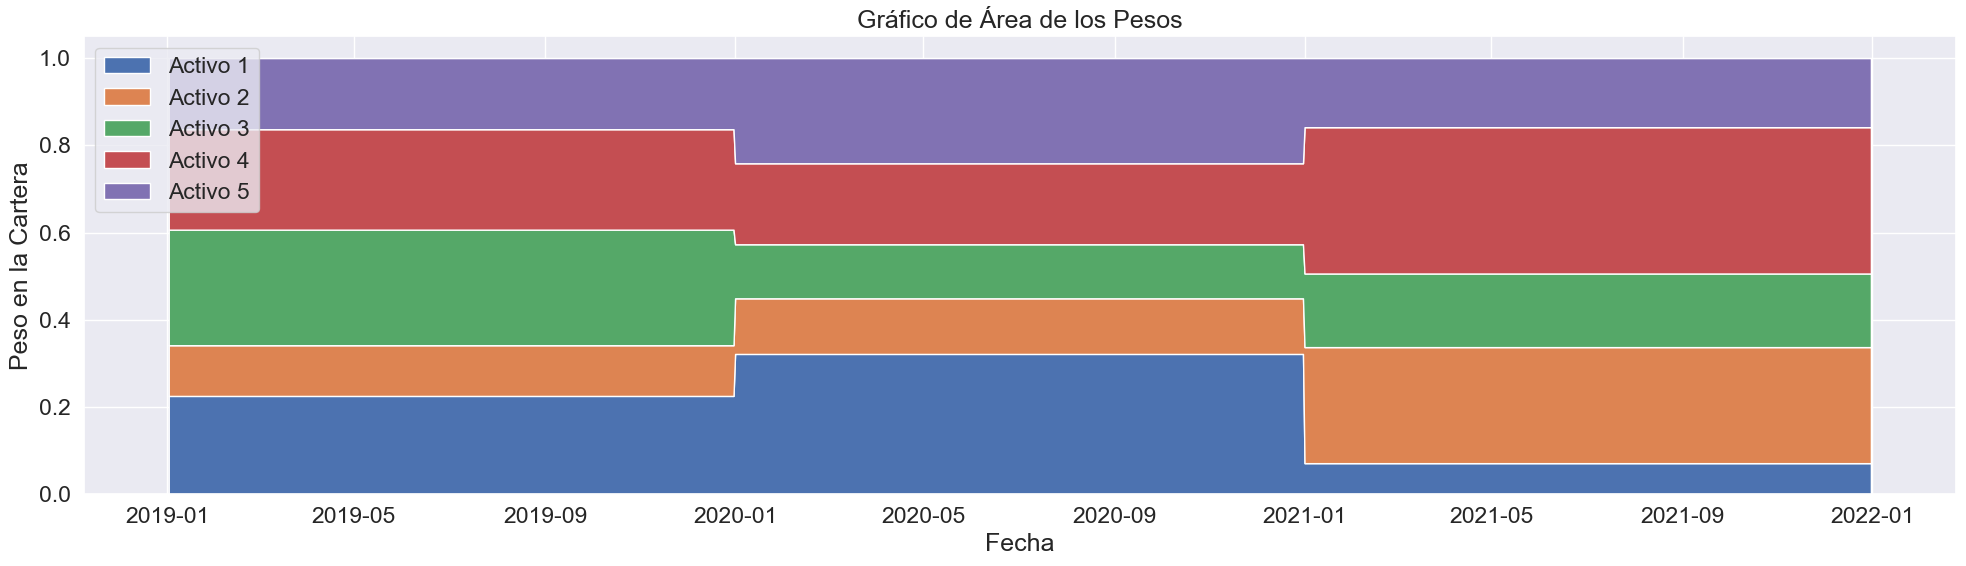

In [ ]:
plt.figure(figsize=(20, 6))
plt.stackplot(weights.index, weights['activo_1'], weights['activo_2'], weights['activo_3'], weights['activo_4'], weights['activo_5'], labels=['Activo 1', 'Activo 2', 'Activo 3', 'Activo 4', 'Activo 5'])

# Añadir leyendas, títulos y etiquetas
plt.legend(loc='upper left')
plt.title('Gráfico de Área de los Pesos')
plt.xlabel('Fecha')
plt.ylabel('Peso en la Cartera')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular la suma total de los pesos para cada fecha
weights['Total'] = weights.sum(axis=1)

Just run once !

In [ ]:
# Calcular los porcentajes para cada activo
for column in weights.columns[:-1]: # excluyendo la columna total
    weights[column + '_Pct'] = (weights[column] / weights['Total']) * 100

In [ ]:
# Mostrar los nuevos datos con los porcentajes en un DataFrame
weights_perc = weights[[col for col in weights.columns if '_Pct' in col]]

In [ ]:
weights_perc.head(1)

,activo_1_Pct,activo_2_Pct,activo_3_Pct,activo_4_Pct,activo_5_Pct
date,,,,,
2019-01-02,22.545796,11.62548,26.500323,23.030958,16.297443


In [ ]:
def find_max_min_dates(df, activo_pct):
    # porcentaje máximo por fecha
    max_value = round(df[activo_pct].max(), 2)
    max_date = df[activo_pct].idxmax()

    # porcentaje mínimo por fecha
    min_value = round(df[activo_pct].min(), 2)
    min_date = df[activo_pct].idxmin()

    print(f"El máximo {activo_pct} is {max_value}% on {max_date}")
    print(f"El mínimo {activo_pct} is {min_value}% on {min_date}")

    return (max_date, max_value, min_date, min_value)

In [ ]:
for i in range(1, 6):
    asset_column = f'activo_{i}_Pct'
    print(f"\n\nAnálisis de {asset_column}:\n")
    find_max_min_dates(weights_perc, asset_column)



Análisis de activo_1_Pct:

El máximo activo_1_Pct is 32.17% on 2020-01-01 00:00:00
El mínimo activo_1_Pct is 7.13% on 2021-01-01 00:00:00


Análisis de activo_2_Pct:

El máximo activo_2_Pct is 26.61% on 2021-01-01 00:00:00
El mínimo activo_2_Pct is 11.63% on 2019-01-02 00:00:00


Análisis de activo_3_Pct:

El máximo activo_3_Pct is 26.5% on 2019-01-02 00:00:00
El mínimo activo_3_Pct is 12.39% on 2020-01-01 00:00:00


Análisis de activo_4_Pct:

El máximo activo_4_Pct is 33.55% on 2021-01-01 00:00:00
El mínimo activo_4_Pct is 18.57% on 2020-01-01 00:00:00


Análisis de activo_5_Pct:

El máximo activo_5_Pct is 24.11% on 2020-01-01 00:00:00
El mínimo activo_5_Pct is 15.84% on 2021-01-01 00:00:00


<h2 style="color: #FF6347;">Respuesta</h2>

<ul>
    <li><strong>Cambios en la Dominancia:</strong>
        <ul>
            <li>El <span style="color: blue;">Activo 1</span> (más estable en el tiempo) tiene una disminución de su peso en la cartera, siendo el punto más bajo a principios de 2021.</li>
            <li>El <span style="color: orange;">Activo 2</span> aumentó su participación a principios de 2021, que corresponde a los gráficos iniciales de rendimiento.</li>
            <li>El <span style="color: green;">Activo 3</span> tuvo su peso más alto al inicio, presentando disminuciones desde 2020.</li>
            <li>El <span style="color: red;">Activo 4</span> parece estable y con tendencia al crecimiento.</li>
        </ul>
    </li>
    <li><strong>Balance:</strong>
        <ul>
            <li>Parece una cartera balanceada, siendo los <span style="color: blue;">activos 1</span> y <span style="color: red;">4</span> más estables en periodos de incertidumbre.</li>
        </ul>
    </li>
</ul>

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
# Tenemos returns definido cuando queriamos calcular los rendimientos diarios. Ahora, multiplicamos los rendimientos por los pesos de los activos para obtener los rendimientos ponderados.
weighted_returns = returns.mul(weights.shift(1), axis=1)

In [ ]:
# Cálculo de los rendimientos ponderados y acumulados
port_returns = weighted_returns.sum(axis=1)
acumulative_returns = (port_returns + 1).cumprod()

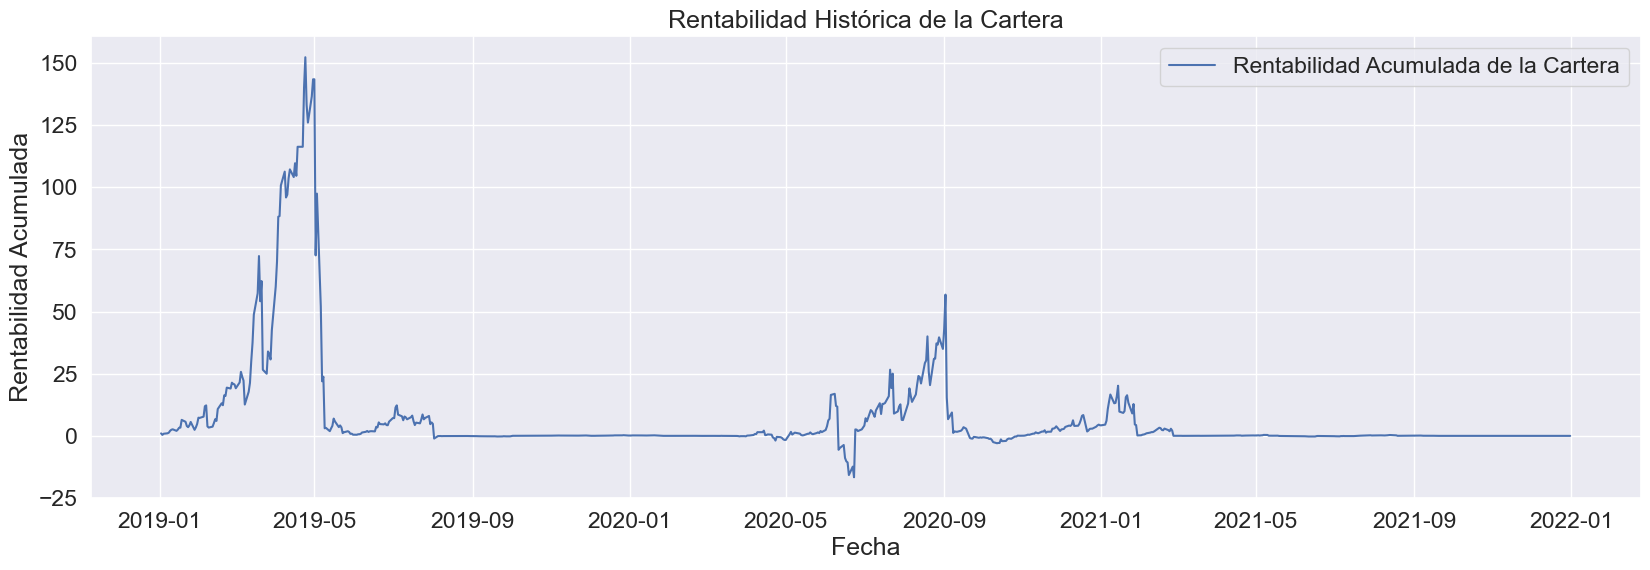

In [ ]:
# Gráfico de la rentabilidad histórica acumulado de la cartera
plt.figure(figsize=(20, 6))
plt.plot(acumulative_returns.index, acumulative_returns, label='Rentabilidad Acumulada de la Cartera')
plt.title('Rentabilidad Histórica de la Cartera')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Respuesta</h2>

* **Volatilidad:** Parece ser una cartera con una alata volatilidad, se ven grandes picos de subida a inicios 2019, con una posterior caída y estabilización para luego volver estar afectada por otra caída y picos en 2020.
* Después de cada pico, hay una caída en el rendimiento para volverse estabilizarse, explicado con los activos de mayor rendimiento a corto plazo.
* A pesar de su  aparente volatildiad, la tendencia general parece ser balanceada y positiva.

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
# Tenemos returns y weights definidos en códigos previos
# Calculo de los rendimientos ponderados:
portfolio_daily_returns = (returns * weights).sum(axis=1)

In [ ]:
# Rentabilidad media diaria
portfolio_daily_mean_return = portfolio_daily_returns.mean()

# Convertir la media diaria de retorno a una tasa de retorno diaria en forma decimal
return_daily_mean_decimal = portfolio_daily_mean_return / 100

In [ ]:
# Calculo de la rentabilidad anualizada de la cartera, factor de anualización de 261 días
portfolio_yearly_return = ((1 + return_daily_mean_decimal) ** 261) - 1 # Fórmula adaptada de --> https://campus.datacamp.com/courses/introduction-to-portfolio-analysis-in-python/risk-and-return?ex=1

# Cálculo a porcentaje
portfolio_yearly_return_pct = round(portfolio_yearly_return * 100, 2)

In [ ]:
print(f"Rentabilidad Anualizada de la Cartera: {portfolio_yearly_return_pct}%")

Rentabilidad Anualizada de la Cartera: 11.9%


* Un **11.9%** como rentabilidad anualizada es positivo

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
portfolio_daily_volatility = portfolio_daily_returns.std()

In [ ]:
portfolio_yearly_volatility = round(portfolio_daily_volatility * np.sqrt(261), 2)

In [ ]:
print(f"Volatilidad Anualizada de la Cartera: {portfolio_yearly_volatility}%")

Volatilidad Anualizada de la Cartera: 8.51%


* Una volatilidad anualizada de la cartera de **8.51%** indica una volatilidad moderada a lo largo del tiempo, es una cartera aparentemente equilibrada.
* Este tipo de volatilidad es adecuada para una inversión a largo plazo.

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
assets_info = pd.read_csv('financial_assets_information.csv')
assets_info.head(10)

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [ ]:
weights = weights.reset_index() # reseteamos indice, haremos groupby por dates

In [ ]:
# Traducimos los nombres
assets_info = pd.DataFrame({
    'Asset': ['activo_1', 'activo_2', 'activo_3', 'activo_4', 'activo_5'],
    'Family': ['Renta Fija', 'Renta Fija', 'Renta Variable', 'Renta Variable', 'Inversiones Alternativas']
})
assets_info.head(10)

,Asset,Family
0,activo_1,Renta Fija
1,activo_2,Renta Fija
2,activo_3,Renta Variable
3,activo_4,Renta Variable
4,activo_5,Inversiones Alternativas


* Sorprendentemente, el Activo 2 es de renta fija, a pesar de ello presenta evoluciones con picos y correlacionados con el activo 4 que es variable.

In [ ]:
# Unimos los activos al df de asset_info para conocer su familia
merged_df = pd.melt(weights, id_vars='date', var_name='Asset', value_name='Weight').merge(assets_info, on='Asset')
merged_df.head(5)

,date,Asset,Weight,Family
0,2019-01-02,activo_1,0.225458,Renta Fija
1,2019-01-03,activo_1,0.225458,Renta Fija
2,2019-01-04,activo_1,0.225458,Renta Fija
3,2019-01-07,activo_1,0.225458,Renta Fija
4,2019-01-08,activo_1,0.225458,Renta Fija


In [ ]:
# Groupby por fecha y familia, sumamos
grouped = merged_df.groupby(['date', 'Family'])['Weight'].sum().unstack()

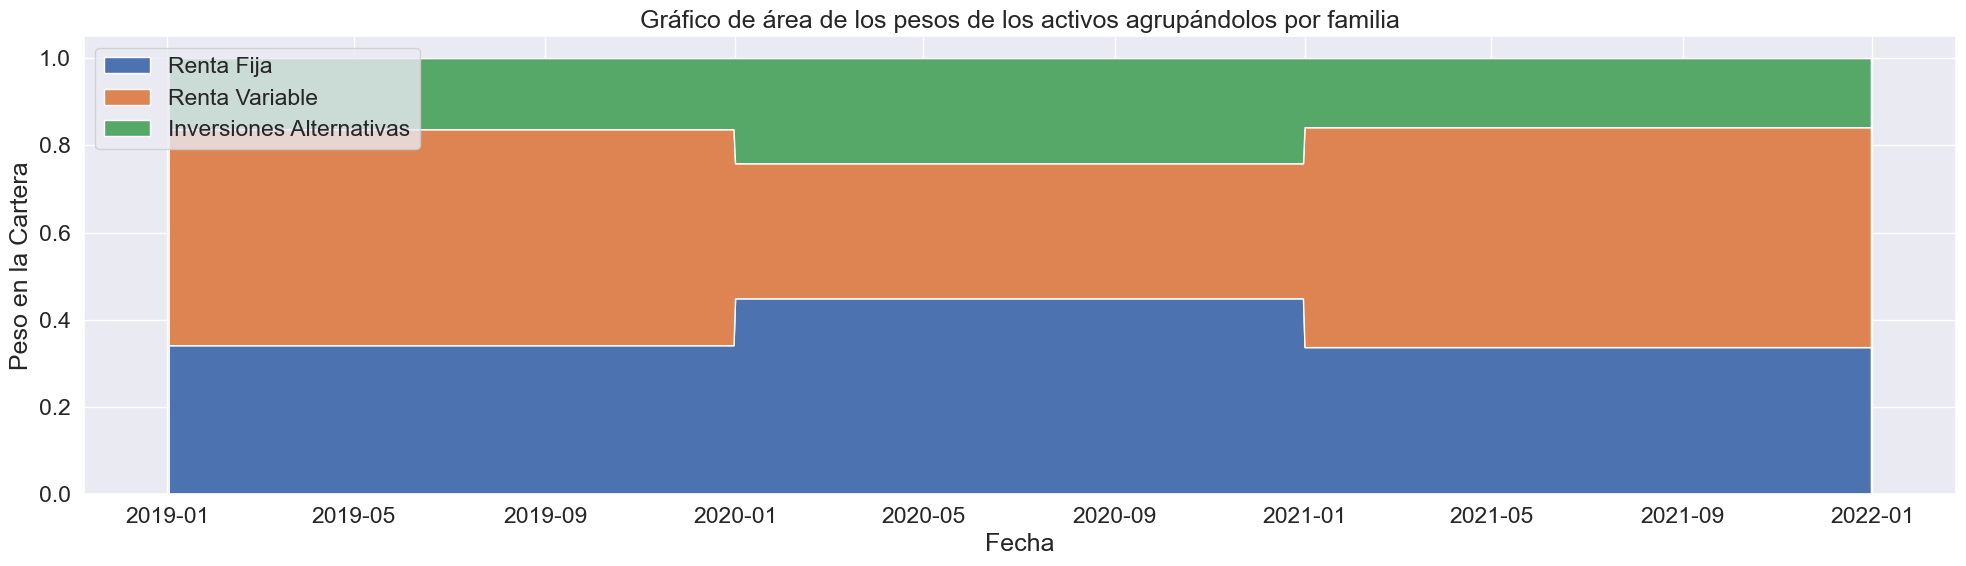

In [ ]:
plt.figure(figsize=(20, 6))
plt.stackplot(pd.to_datetime(grouped.index), grouped['Renta Fija'], grouped['Renta Variable'], grouped['Inversiones Alternativas'], labels=['Renta Fija', 'Renta Variable', 'Inversiones Alternativas'])

plt.legend(loc='upper left')
plt.title('Gráfico de área de los pesos de los activos agrupándolos por familia')
plt.xlabel('Fecha')
plt.ylabel('Peso en la Cartera')
plt.tight_layout()

plt.show()

* Parece ser una cartera bien **diversificada**, con preferencia a la **renta fija** que podría indicar una inversión conservadora, siendo además un indicador muy constante en la gráfica.
* Es una cartera de poco riesgo.

**Futuro Desarollo:**
* Se podría realizar modelos de TimeSeries para poder predecir la **rentabilidad** y optimizar mejor los activos ajustándolo al riesgo.
* También, se podría utilizar modelos de RandomForest o Regression para poder identificar patrones de **volatilidad** e intentar minimizarla.

<h1 style="color: #FF8C00;">Referencias:</h1>

* https://github.com/isi-mube
* https://www.pypro.mx/app/curso/portafolios-de-inversion-con-python
* https://campus.datacamp.com/courses/introduction-to-portfolio-analysis-in-python/risk-and-return?ex=1